<a href="https://colab.research.google.com/github/guilhermelaviola/DataScienceApplicationsInComputerVision/blob/main/Class13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Developing Solutions with Convolution and DNNs**
In recent years, the field of computer vision has been revolutionized by the use of convolutional neural networks (CNNs) and deep neural networks (DNNs). These innovative architectures, inspired by the workings of the human brain, have enabled the solution of extremely challenging problems, opening new frontiers in image processing and visual understanding.

In [1]:
# Importing all the necessary libraries and resources:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Loading the CIFAR-10 dataset:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the images:
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# Defining the architecture to be used in the CNN:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers. Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compiling the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
# Training the model:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.3449 - loss: 1.7622 - val_accuracy: 0.5291 - val_loss: 1.2868
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.5773 - loss: 1.1879 - val_accuracy: 0.6117 - val_loss: 1.0800
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 48ms/step - accuracy: 0.6409 - loss: 1.0115 - val_accuracy: 0.6613 - val_loss: 0.9688
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6825 - loss: 0.9063 - val_accuracy: 0.6726 - val_loss: 0.9293
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7113 - loss: 0.8240 - val_accuracy: 0.6782 - val_loss: 0.9200
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7290 - loss: 0.7762 - val_accuracy: 0.7013 - val_loss: 0.8590
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.7447 - loss: 0.7259 - val_accuracy: 0.7044 - val_loss: 0.8568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.7637 

In [15]:
# Evaluating the model:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 5s - 15ms/step - accuracy: 0.7092 - loss: 0.8696
Test accuracy: 0.7092000246047974


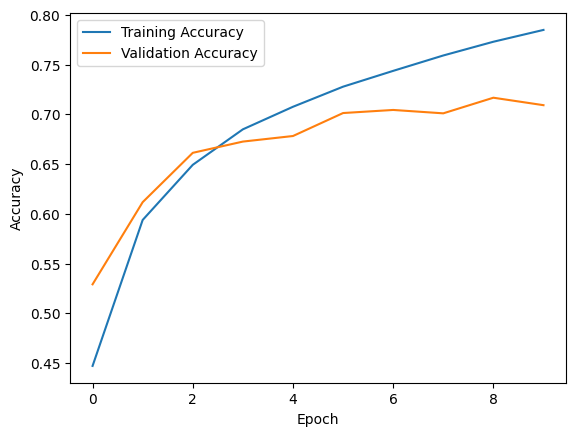

In [16]:
# Plotting the accuracy during the training:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()